# Topic Analysis of Hyperpartisan News Articles

#### Some sort of explanation of our project

In [9]:
%%capture

!pip install nltk
!pip install tomotopy
!pip install seaborn

In [10]:
import tomotopy
import nltk
import pandas as pd

## Access XML data for topic model

In [11]:
import xml.etree.cElementTree as et

In [12]:
article_training_tree = et.parse("data/articles-training-byarticle-20181122.xml")
publisher_training_tree = et.parse("data/articles-training-bypublisher-20181122.xml")
publisher_validation_tree = et.parse("data/articles-validation-bypublisher-20181122.xml")

article_training_root = article_training_tree.getroot()
publisher_training_root = publisher_training_tree.getroot()
publisher_validation_root = publisher_validation_tree.getroot()

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fwright/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
print(stoplist)

{'to', 'my', "shouldn't", 'until', 'can', "you'd", 'these', "hasn't", 'hadn', "needn't", "isn't", "wasn't", 'here', "don't", 'other', 'some', 'over', 'such', "shan't", 'than', 'itself', 'will', 'at', 'aren', 's', 'any', "should've", "haven't", 'where', 'was', 'hers', 'between', 'by', 'who', 'has', 'your', "that'll", 'into', 'does', 'y', 'in', 'all', 'our', "didn't", 'few', 'haven', 'ours', "aren't", 'being', "weren't", 'don', 'before', 'when', 'under', 'ain', 'her', "mightn't", 'their', 'for', 'because', 'above', 'isn', 'through', 'why', 'very', 're', 'himself', 't', 'didn', 'if', 'yourself', 'too', 'd', 'then', 'nor', 'there', 'about', 'hasn', 'but', 'down', 'couldn', "she's", "doesn't", 'his', 'a', 'that', "wouldn't", 'each', 'off', 'again', 'not', 'should', 'below', 'more', "won't", 'those', 'i', 'we', 'you', 'mustn', 'as', 'an', 'myself', 'is', "couldn't", 'yourselves', 'out', 'weren', 'no', "you're", 'during', 'while', 'wasn', 'the', 'am', 'of', 'after', 'once', 'how', 'them', 'wh

In the cell below, we get the text out of each of our articles to pass into the topic model. We apply lowercase to all of our words so that words with capital letters are treated the same as their lowercase counterparts, and so that words with capital letters will also be checked against the stoplist.

In [50]:
article_list = []
articles = []

for article in article_training_root:
    article_words = []
    article_text = ""
    for paragraph in article:
        if paragraph.text is not None:
            article_words += [word for word in paragraph.text.lower().split() if word not in stoplist and word.isalpha()]
            article_text += paragraph.text + " "
    article_list += [article_words]
    articles += [article_text]
print(len(article_list))

645


In [51]:
articles[0][:100]

'Money (  The walls are closing in on Congress. Terrifying walls of water from Hurricanes Harvey and '

In [52]:
for article in publisher_training_root:
    article_words = []
    article_text = ""
    for paragraph in article:
        if paragraph.text is not None:
            article_words += [word for word in paragraph.text.lower().split() if word not in stoplist and word.isalpha()]
            article_text += paragraph.text + " "
    article_list += [article_words]
    articles += [article_text]
print(len(article_list))

600645


In [53]:
for article in publisher_validation_root:
    article_words = []
    article_text = ""
    for paragraph in article:
        if paragraph.text is not None:
            article_words += [word for word in paragraph.text.lower().split() if word not in stoplist and word.isalpha()]
            article_text += paragraph.text + " "
    article_list += [article_words]
    articles += [article_text]
print(len(article_list))

750645


## Topic Modeling

In [44]:
n_topics = 20
n_docs = len(article_list)

Now, we will train a topic model using the tomotopy package. The below cell is commented out since it takes a long time to run with our large quantity of data, but can be uncommented to retrain the model.

In [45]:
# mdl = tomotopy.LDAModel(k=n_topics)
# for article in article_list:
#   mdl.add_doc(article)

# iters_per_check = 50
# for i in range(0, 1000, iters_per_check):
#     mdl.train(iters_per_check)
#     print('Iteration: {}\tLog-likelihood: {}'.format(i+iters_per_check, mdl.ll_per_word))

In [46]:
# #save into file
# mdl.save('mdl.bin')

# load from file
mdl = tomotopy.LDAModel.load('mdl.bin')

In [47]:
# Print top 10 words of each topic
print("Top 10 words by topic")
for k in range(n_topics):
    print('#{}: {}'.format(k, ' '.join([w for (w, prop) in mdl.get_topic_words(k, top_n=10)])))

Top 10 words by topic
#0: one people american even us political many would like world
#1: police said two told man gun say officers according one
#2: school students new health university said women education schools also
#3: trump president said news white house media donald former fox
#4: republican obama party campaign democratic president political republicans election democrats
#5: percent said rose market prices last fell oil since new
#6: people government immigration said many south country border president also
#7: would tax health said bill state new house care federal
#8: military war israel us iraq israeli palestinian said government islamic
#9: court state said law federal would legal texas public case
#10: new city said advertisement santa mexico county local says also
#11: financial money us bank tax credit banks debt would income
#12: company stock revenue sales million continue billion year growth investors
#13: new church first also said one baptist film music years
#

In [48]:
# Survey stats. Notably, I'm using all the data as training data - you can also
# generate metrics using the mdl.infer() method if you want to use held-out
# data to see if the topic model generalizes well.
# See https://bab2min.github.io/tomotopy/v0.4.1/en/#tomotopy.LDAModel.infer
mdl.summary()

<Basic Info>
| LDAModel (current version: 0.12.7)
| 746557 docs, 187266574 words
| Total Vocabs: 477650, Used Vocabs: 477650
| Entropy of words: 8.86260
| Entropy of term-weighted words: 8.86260
| Removed Vocabs: <NA>
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -9.19368
|
<Initial Parameters>
| tw: TermWeight.ONE
| min_cf: 0 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 0 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (hyperparameter of Dirichlet distribution for document-topic, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic-word)
| seed: 1925384817 (random seed)
| trained in version 0.12.7
|
<Parameters>
| alpha (Dirichlet prior on the per-document topic distributions)
|  

## Access CSV

In [59]:
df_articles = pd.read_csv("data/analysis_df.csv")

df_articles.head(700)

,Unnamed: 0,id,hyperpartisan,labeled-by,url,published-at,bias
0,0,0,True,article,https://www.opednews.com/articles/Kucinich-Rec...,2017-09-10,NaN
1,1,1,True,article,http://bipartisanreport.com/2017/10/12/trump-j...,2017-10-12,NaN
2,2,2,True,article,https://www.reviewjournal.com/opinion/letters/...,2017-10-11,NaN
3,3,3,True,article,https://www.redcuprebellion.com/2017/9/24/1635...,2017-09-24,NaN
4,4,4,False,article,https://www.realclearpolitics.com/articles/201...,2017-10-12,NaN
...,...,...,...,...,...,...,...
695,695,146,True,publisher,http://politicalillusionsexposed.com/krauthamm...,NaN,right
696,696,152,False,publisher,https://abqjournal.com/27016/board-of-finance-...,NaN,least
697,697,156,False,publisher,https://newsline.com/singapore-issues-more-fin...,2017-12-18,right-center
698,698,157,True,publisher,https://truthdig.com/articles/a-carbon-levy-is...,2015-12-11,left


## Cluster Topic Vectors

In [34]:
from collections import Counter

import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

In [35]:
# Let's get the topic proportions for each document
doc_topic_props = np.zeros(shape=(n_docs, n_topics))
for i, doc in enumerate(mdl.docs):
    doc_topic_props[i, :] = doc.get_topic_dist()

In [38]:
# Now, let's try to get five clusters from KMeans
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
n_clusters = 10
kmm = KMeans(n_clusters=n_clusters)
cluster_labels = kmm.fit_predict(doc_topic_props)

In [54]:
# How big and how positive is each cluster?
# For convenience, let's turn our labels into a 1d numpy array
hyperpartisan_labels = np.array(df_articles["hyperpartisan"])

for k in range(n_clusters):
    # Which documents have the right cluster label
    cluster_doc_idxs = np.argwhere(cluster_labels == k).ravel()
    label_count = Counter(hyperpartisan_labels[cluster_doc_idxs])
    cluster_size = len(cluster_doc_idxs)
    print("Cluster {}: {} total, {:.1f}% Hyperpartisan".format(k, cluster_size, label_count[True] * 100 / cluster_size))

Cluster 0: 242955 total, 50.0% Hyperpartisan
Cluster 1: 108825 total, 50.1% Hyperpartisan
Cluster 2: 59801 total, 49.9% Hyperpartisan
Cluster 3: 71361 total, 49.9% Hyperpartisan
Cluster 4: 30488 total, 49.4% Hyperpartisan
Cluster 5: 48279 total, 49.9% Hyperpartisan
Cluster 6: 64999 total, 50.2% Hyperpartisan
Cluster 7: 51014 total, 50.2% Hyperpartisan
Cluster 8: 30316 total, 49.8% Hyperpartisan
Cluster 9: 42607 total, 49.9% Hyperpartisan


In [55]:
# Let's get some sample documents from each label:
n_sample_docs = 5
for k in range(n_clusters):
    print("Documents in cluster k:")
    cluster_doc_idxs = np.argwhere(cluster_labels == k).ravel()
    random_doc_idxs = np.random.choice(cluster_doc_idxs, size=n_sample_docs, replace=False)
    for didx in random_doc_idxs:
      print("Document {} ({}): {}...".format(didx, hyperpartisan_labels[didx], articles[didx][:100]))

Documents in cluster k:
Document 709062 (True): Right-wing religious figures, such as Bryan Fischer of the American Family Association, are throwing...
Document 325109 (False): The Japanese government has placed a ban on rice produced near the  Rice produced at a farm about 60...
Document 198950 (False): BOSTON (MA)Boston GlobeBy Rich Barlow, Globe Staff, 4/19/2003 What could Easter, the joyous pinnacle...
Document 271202 (True): N.Y. Post : I-MADE-it-up memoirist James Frey's new megabucks book deal has exploded into a million ...
Document 253989 (False): BEVERLY HILLS, Calif. (AP) — The following is the full text of Oprah Winfrey’s speech as she accepte...
Documents in cluster k:
Document 179432 (True): (Gateway Pundit) – Last night,&#160;the Associated Press announced&#160;that Hillary has accrued the...
Document 282721 (True): In the wake of the financial crisis, fierce criticism has rained down on regulators of all stripes f...
Document 234567 (False): .......... .......... ......

In [56]:
# We want to visualize our clusters, so we'll do dimensionality reduction with t-SNE
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
# note - TSNE is slow!
tsne_docs = TSNE().fit_transform(doc_topic_props)

<Axes: >

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


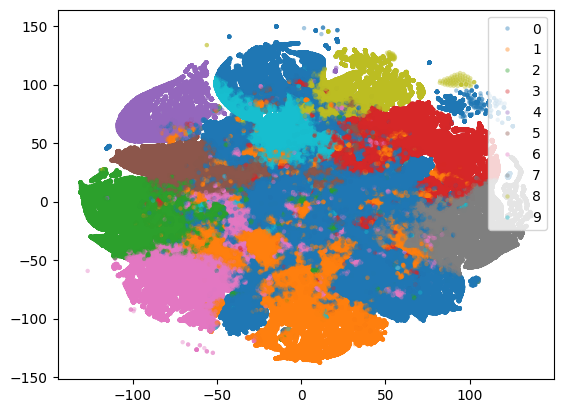

In [57]:
# Basic plotting approach: a scatterplot
sns.scatterplot(x=tsne_docs[:,0], y=tsne_docs[:,1], hue=[str(l) for l in cluster_labels], alpha=0.4, s=10, linewidth=0, hue_order=(str(i) for i in range(n_clusters)))

<Axes: >

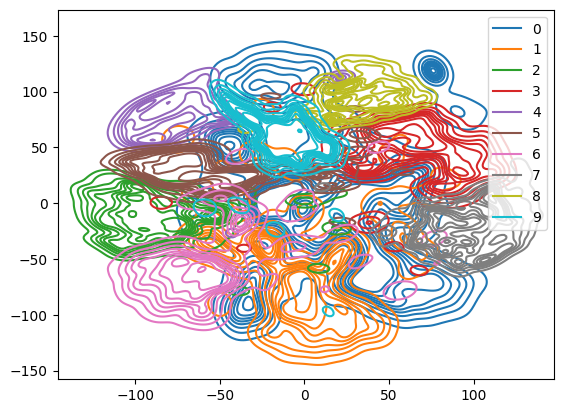

In [58]:
# Alternate plotting approach: a "kernel density estimate", which gives contoured estimates of data density
sns.kdeplot(x=tsne_docs[:,0], y=tsne_docs[:,1], hue=[str(l) for l in cluster_labels], hue_order=(str(i) for i in range(n_clusters)))

In [74]:
# How big and how positive is each cluster?
# For convenience, let's turn our labels into a 1d numpy array
hyperpartisan_labels = np.array(df_articles["bias"])

for k in range(n_clusters):
    # Which documents have the right cluster label
    cluster_doc_idxs = np.argwhere(cluster_labels == k).ravel()
    label_count = Counter(hyperpartisan_labels[cluster_doc_idxs])
    cluster_size = len(cluster_doc_idxs)
    print(f"Cluster {k}: {cluster_size} total, {label_count['right'] * 100 / cluster_size :.1f}% right, {label_count['left'] * 100 / cluster_size :.1f}% left")

Cluster 0: 242955 total, 25.1% right, 24.9% left
Cluster 1: 108825 total, 25.0% right, 25.1% left
Cluster 2: 59801 total, 24.9% right, 25.0% left
Cluster 3: 71361 total, 25.1% right, 24.8% left
Cluster 4: 30488 total, 24.7% right, 24.7% left
Cluster 5: 48279 total, 24.9% right, 25.0% left
Cluster 6: 64999 total, 25.0% right, 25.1% left
Cluster 7: 51014 total, 24.8% right, 25.3% left
Cluster 8: 30316 total, 24.8% right, 25.0% left
Cluster 9: 42607 total, 24.8% right, 25.1% left


## Analyze clusters